In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
main_data= pd.read_csv("SIH_main.csv")

In [3]:
main_data.head(5)

,id,time_required,option_marked_id,question_id,assignment_id,correct,user_id
0,6336,2848,351769,88204,1,NaN,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1
1,6337,2926,387060,97031,1,NaN,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1
2,6338,3567,351769,88204,1,NaN,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1
3,6339,2383,387060,97031,1,NaN,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1
4,6340,2761,387101,97041,1,NaN,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1


In [4]:
secondary_data= pd.read_csv("SIH_secondary.csv")

In [5]:
secondary_data.head()

,id,title,answer_id,specialization,attachment,rating
0,158378,Which of the following is a widely used and ef...,632349.0,Deep & Reinforcement Learning,NaN,4
1,112049,Log loss Is also known as\tWhich vendor recent...,447120.0,Deep & Reinforcement Learning,NaN,3
2,112051,Deep learning is preferred over machine learni...,447128.0,Deep & Reinforcement Learning,NaN,3
3,112056,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,NaN,4
4,112065,Assume a simple MLP model with 3 neurons and i...,447184.0,Deep & Reinforcement Learning,NaN,3


In [6]:
main_data=main_data.merge(secondary_data, how="left", left_on="question_id", right_on="id")

In [7]:
# Comparing option_marked_id of main_data and answer_id of secondary_data to fill the values of 'correct' column in main_data
main_data["correct"] = main_data["option_marked_id"]==main_data["answer_id"]

In [8]:
main_data.head()

,id_x,time_required,option_marked_id,question_id,assignment_id,correct,user_id,id_y,title,answer_id,specialization,attachment,rating
0,6336,2848,351769,88204,1,False,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,88204,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3
1,6337,2926,387060,97031,1,True,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,97031,You are building a binary classifier for recog...,387060.0,Deep & Reinforcement Learning,NaN,5
2,6338,3567,351769,88204,1,False,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,88204,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3
3,6339,2383,387060,97031,1,True,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,97031,You are building a binary classifier for recog...,387060.0,Deep & Reinforcement Learning,NaN,5
4,6340,2761,387101,97041,1,False,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,97041,Which one of the following is not a hyperparam...,387103.0,Deep & Reinforcement Learning,NaN,5


In [9]:
main_data=main_data.drop("id_y", axis="columns")

In [10]:
main_data.rename(columns={"id_x": "id"}, inplace=True)
main_data.rename(columns={"assignment_id": "test_attempts"}, inplace=True)

In [11]:
main_data.head()

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,attachment,rating
0,6336,2848,351769,88204,1,False,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3
1,6337,2926,387060,97031,1,True,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,You are building a binary classifier for recog...,387060.0,Deep & Reinforcement Learning,NaN,5
2,6338,3567,351769,88204,1,False,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3
3,6339,2383,387060,97031,1,True,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,You are building a binary classifier for recog...,387060.0,Deep & Reinforcement Learning,NaN,5
4,6340,2761,387101,97041,1,False,f6bce875-fd42-4f9a-ab4c-7dbca1b128e1,Which one of the following is not a hyperparam...,387103.0,Deep & Reinforcement Learning,NaN,5


# Our general Parameters (for segregating them into easy, medium and hard)
1. Time required to solve that question
2. Count of each question
3. Average time spent on that particular question
4. Accuracy of that question 
5. Is it correctly marked?(1-True,0-False) 
6. Calculate new difficulty from previous difficulty (Update Difficulty) 
7. Overall Performance

In [12]:
#  Time Required
# Sorting the DataFrame by 'time_required' column in descending order
sorted_data = main_data.sort_values(by="time_required", ascending=False)

In [13]:
sorted_data.head(5)

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,attachment,rating
811,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,NaN,3
821,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,NaN,5
824,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,NaN,3
828,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,NaN,4
178,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3


In [14]:
# Question_Count
# Creating a new column 'question_count' to count occurrences of each question_id
sorted_data["question_count"] = sorted_data.groupby("question_id")[
    "question_id"
].transform("count")

In [15]:
sorted_data.head(5)

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,attachment,rating,question_count
811,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,NaN,3,16
821,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,NaN,5,12
824,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,NaN,3,14
828,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,NaN,4,13
178,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3,27


In [16]:
# Average Time spent per question
# Grouping data by 'question_id' and calculating the average time spent
avg_time_spent_per_question = sorted_data.groupby("question_id")["time_required"].mean()

In [17]:
# Mapping the 'question_id' in the DataFrame to their respective average times
sorted_data["avg_time_spent_per_question"] = sorted_data["question_id"].map(
    avg_time_spent_per_question
)

In [18]:
sorted_data.head(5)

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,attachment,rating,question_count,avg_time_spent_per_question
811,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,NaN,3,16,96249.875000
821,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,NaN,5,12,47925.083333
824,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,NaN,3,14,30733.071429
828,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,NaN,4,13,33397.000000
178,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3,27,32720.222222


In [19]:
# Accuracy of the question
# It can be determined by calculating "correct responses/ total responses" for particular question

# Calculating total correct and total responses per question
question_accuracy = sorted_data.groupby("question_id").agg(
    total_correct=("correct", "sum"), total_responses=("id", "count")
)

In [20]:
# # Calculating accuracy
question_accuracy["accuracy"] = (
    question_accuracy["total_correct"] / question_accuracy["total_responses"]
)

In [21]:
# Merging accuracy back into the original DataFrame based on 'question_id'
sorted_data = sorted_data.merge(question_accuracy, on="question_id", how="left")

In [22]:
sorted_data.head(10)

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,attachment,rating,question_count,avg_time_spent_per_question,total_correct,total_responses,accuracy
0,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,NaN,3,16,96249.875000,9,16,0.562500
1,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,NaN,5,12,47925.083333,6,12,0.500000
2,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,NaN,3,14,30733.071429,6,14,0.428571
3,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,NaN,4,13,33397.000000,3,13,0.230769
4,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3,27,32720.222222,5,27,0.185185
5,7156,193905,388265,97332,1,True,20e76612-a4da-4a05-b9e5-5c1c68d58e09,If we have 7 filters that are 3X3X3 in one lay...,388265.0,Deep & Reinforcement Learning,NaN,3,20,22874.200000,7,20,0.350000
6,6882,122175,577084,144559,0,False,20e76612-a4da-4a05-b9e5-5c1c68d58e09,The number of nodes in the input layer is 10 a...,577082.0,Deep & Reinforcement Learning,NaN,5,6,27453.833333,2,6,0.333333
7,7017,95597,447181,112065,1,False,c9adc79b-2cab-4868-95be-dcfa6f8f6cd1,Assume a simple MLP model with 3 neurons and i...,447184.0,Deep & Reinforcement Learning,NaN,3,13,18332.692308,1,13,0.076923
8,7151,94347,446959,112009,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,Reinforcement learning is also known as,446957.0,Deep & Reinforcement Learning,NaN,3,15,15531.800000,7,15,0.466667
9,6590,91510,445461,111635,0,False,20e76612-a4da-4a05-b9e5-5c1c68d58e09,Curse of dimensionality refers to,445462.0,Deep & Reinforcement Learning,NaN,4,17,17158.941176,2,17,0.117647


In [23]:
# Calculate new difficulty from previous difficulty (Update Difficulty)
# We will use Performace based approach: calculating difficulty based on actual student performance, e.g., average success rate or average time taken to solve a question
# In mathematical terms: the updated difficulty could be calculated as a weighted average of previous difficulty and recent performance

# We will store previous difficulty in "difficulty" column and new difficulty in "correct" column

# Initializing difficulty_column with 0.5 as "threshold"
sorted_data["difficulty"] = 0.5
threshold = 0.5

In [24]:
def update_difficulty_with_threshold(previous_difficulty, correct, threshold):
    # If the student answered correctly, we will decrease the threshold for easier questions
    if correct == 1:
        threshold -= 0.1  # We can adjust it according to our req
    else:
        threshold += 0.1  # Increase threshold for more difficult questions

    # Threshold stays within the range of 0 to 1
    threshold = max(0, min(1, threshold))

    # Updating difficulty based on the threshold
    if previous_difficulty >= threshold:
        updated_difficulty = previous_difficulty - 0.1  # Decrease difficulty
    else:
        updated_difficulty = previous_difficulty + 0.1  # Increase difficulty

    # Difficulty stays within the range of 0 to 1
    updated_difficulty = max(0, min(1, updated_difficulty))

    return updated_difficulty, threshold


# Applying the function to update difficulty based on threshold
# lambda function is used in conjunction with the apply() method in pandas to apply the update_difficulty_with_threshold function to each row in the dataframe.
sorted_data["updated_difficulty"] = sorted_data.apply(
    lambda row: update_difficulty_with_threshold(
        row["difficulty"], row["correct"], threshold
    )[0],
    axis=1,  # Apply the function row-wise
)
# -> Will decide later as what to pass here. Because it depends upon studenst actual response

In [25]:
sorted_data.head(5)

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,attachment,rating,question_count,avg_time_spent_per_question,total_correct,total_responses,accuracy,difficulty,updated_difficulty
0,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,NaN,3,16,96249.875000,9,16,0.562500,0.5,0.4
1,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,NaN,5,12,47925.083333,6,12,0.500000,0.5,0.6
2,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,NaN,3,14,30733.071429,6,14,0.428571,0.5,0.4
3,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,NaN,4,13,33397.000000,3,13,0.230769,0.5,0.6
4,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,NaN,3,27,32720.222222,5,27,0.185185,0.5,0.6


In [26]:
# Overall Performance
# Calculating the correct answers percentage for each user
user_correct_percentage = sorted_data.groupby("user_id")["correct"].mean()
print(user_correct_percentage.head())

# Computing the average time per question for each user
user_avg_time_per_question = sorted_data.groupby("user_id")["time_required"].mean()
print(user_avg_time_per_question.head())

# Calculating the weighted accuracy based on difficulty
sorted_data["weighted_accuracy"] = sorted_data["correct"] * sorted_data["difficulty"]

user_id
037dbad3-e78e-4c6e-84a6-23b921dad62e    0.134831
0b0e3f8b-5df0-4daf-8b43-79838da8eb2e    0.375000
14c7721b-55b2-470f-9e25-4cd222c72fd7    0.012658
1a90e995-fd6c-45ff-8e66-7a26a6772d26    0.239316
1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1    0.352941
Name: correct, dtype: float64
user_id
037dbad3-e78e-4c6e-84a6-23b921dad62e     1124.685393
0b0e3f8b-5df0-4daf-8b43-79838da8eb2e    25869.571429
14c7721b-55b2-470f-9e25-4cd222c72fd7      901.481013
1a90e995-fd6c-45ff-8e66-7a26a6772d26     3738.085470
1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1    10817.078431
Name: time_required, dtype: float64


In [27]:
# Computing user proficiency based on weighted accuracy
user_proficiency = (
    sorted_data.groupby("user_id")["weighted_accuracy"].sum()
    / sorted_data.groupby("user_id")["difficulty"].sum()
)
print(user_proficiency.head())

user_id
037dbad3-e78e-4c6e-84a6-23b921dad62e    0.134831
0b0e3f8b-5df0-4daf-8b43-79838da8eb2e    0.375000
14c7721b-55b2-470f-9e25-4cd222c72fd7    0.012658
1a90e995-fd6c-45ff-8e66-7a26a6772d26    0.239316
1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1    0.352941
dtype: float64


In [28]:
# Normalizing the metrics
user_correct_percentage = (user_correct_percentage - user_correct_percentage.min()) / (
    user_correct_percentage.max() - user_correct_percentage.min()
)
print(user_correct_percentage.min(), user_correct_percentage.max())

user_avg_time_per_question = (
    user_avg_time_per_question - user_avg_time_per_question.min()
) / (user_avg_time_per_question.max() - user_avg_time_per_question.min())
print(user_avg_time_per_question.min(), user_avg_time_per_question.max())

user_proficiency = (user_proficiency - user_proficiency.min()) / (
    user_proficiency.max() - user_proficiency.min()
)
print(user_proficiency.min(), user_proficiency.max())

0.0 1.0
0.0 1.0
0.0 1.0


In [29]:
# Creating the overall performance metric
# Here, we give 40% weight to correct answers percentage, 30% weight to the inverse of average time per question, and 30% weight to user proficiency (accuracy weighted by difficulty). We can adjust the weights based on the importance of each factor in the overall performance metric
overall_performance = (
    0.3 * user_correct_percentage
    + 0.4
    * (1 - user_avg_time_per_question
    )  # considering time inversely proprtional to performance
    + 0.3 * user_proficiency
)
print(overall_performance)

user_id
037dbad3-e78e-4c6e-84a6-23b921dad62e    0.513705
0b0e3f8b-5df0-4daf-8b43-79838da8eb2e    0.684700
14c7721b-55b2-470f-9e25-4cd222c72fd7    0.410702
1a90e995-fd6c-45ff-8e66-7a26a6772d26    0.598656
1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1    0.685550
20e76612-a4da-4a05-b9e5-5c1c68d58e09    0.622312
315ec434-f72c-49ea-9cb5-de71a4005588    0.506542
4003ccf5-a4ab-4772-8519-c6272ae53e43    0.685587
40f19133-2878-4e15-bdbe-321982d2f59d    0.701813
4b10036e-a391-4969-9905-9d1739a1c898    0.563271
5cd37776-9f54-479e-a25c-aa250a8ea477    0.396985
63113386-b818-4b64-8019-959190d2912a    0.353950
91b6653c-9dad-4ca0-aefa-6784fb434be7    0.000000
961bdd3e-d3ec-4f65-b2eb-8d2bab35385e    0.596420
9bdc1622-32e8-4e2a-b02c-000f18853ae3    0.738463
9dd1bb06-bb7b-40a1-b16b-8227d8330e60    0.381670
b1983ad1-1bf3-4f84-870d-d3158cb98a18    0.388400
c9adc79b-2cab-4868-95be-dcfa6f8f6cd1    0.959719
e1669e25-e920-4cef-9d49-3cbc189c548c    0.603989
e16bc830-e129-4a3c-a363-de7dfccd030f    0.698011
f6bce875-fd4

In [30]:
type(overall_performance)

pandas.core.series.Series

In [31]:
pd.merge(
    sorted_data,
    overall_performance.to_frame(name="overall_performance"),
    how="left",
    on="user_id",
)

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,...,rating,question_count,avg_time_spent_per_question,total_correct,total_responses,accuracy,difficulty,updated_difficulty,weighted_accuracy,overall_performance
0,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,...,3,16,96249.875000,9,16,0.562500,0.5,0.4,0.5,0.506542
1,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,...,5,12,47925.083333,6,12,0.500000,0.5,0.6,0.0,0.506542
2,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,...,3,14,30733.071429,6,14,0.428571,0.5,0.4,0.5,0.506542
3,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,...,4,13,33397.000000,3,13,0.230769,0.5,0.6,0.0,0.506542
4,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,...,3,27,32720.222222,5,27,0.185185,0.5,0.6,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,6414,49,429604,145968,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,The ____________ algorithm allows the informat...,582718.0,Deep & Reinforcement Learning,...,4,6,2080.333333,1,6,0.166667,0.5,0.6,0.0,0.410702
971,6508,34,632140,158378,0,False,1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1,Which of the following is a widely used and ef...,632349.0,Deep & Reinforcement Learning,...,4,5,3987.000000,1,5,0.200000,0.5,0.6,0.0,0.685550
972,6409,30,429604,145943,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,___________ is an optimization algorithm that'...,582618.0,Deep & Reinforcement Learning,...,3,7,4277.714286,2,7,0.285714,0.5,0.6,0.0,0.410702
973,6415,27,429604,146271,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,"In the paradigm of semi-supervised learning, _...",583930.0,Deep & Reinforcement Learning,...,4,5,979.600000,0,5,0.000000,0.5,0.6,0.0,0.410702


# Normalization of the parameters
This is an important process for building a correct dataframe on the basis of the above parameters. It will define a certain range for all the parameters considered such that accuracy is increased allowing us to correctly classify questions into easy, medium and hard!

In [32]:
# Normalize each parameter
max_question_count = sorted_data["question_count"].max()

sorted_data["normalized_time_required"] = (
    sorted_data["time_required"] - sorted_data["time_required"].min()
) / (sorted_data["time_required"].max() - sorted_data["time_required"].min())
# print(normalized_time_required.min(), normalized_time_required.max())

sorted_data["normalized_question_count"] = (
    sorted_data["question_count"] / max_question_count
)

sorted_data["normalized_avg_time_spent_per_question"] = (
    sorted_data["avg_time_spent_per_question"]
    - sorted_data["avg_time_spent_per_question"].min()
) / (
    sorted_data["avg_time_spent_per_question"].max()
    - sorted_data["avg_time_spent_per_question"].min()
)

sorted_data["normalized_accuracy"] = (
    sorted_data["accuracy"] - sorted_data["accuracy"].min()
) / (sorted_data["accuracy"].max() - sorted_data["accuracy"].min())

sorted_data["normalized_updated_difficulty"] = (
    sorted_data["updated_difficulty"] - sorted_data["updated_difficulty"].min()
) / (sorted_data["updated_difficulty"].max() - sorted_data["updated_difficulty"].min())


In [33]:
def calculate_composite(row):
    composite_value = (
        0.1 * row["normalized_time_required"]
        + 0.2 * row["normalized_question_count"]
        + 0.1 * row["normalized_avg_time_spent_per_question"]
        + 0.3 * row["normalized_accuracy"]
        + 0.2 * row["normalized_updated_difficulty"]
    )
    return composite_value

In [34]:
sorted_data["composite_value"] = sorted_data.apply(calculate_composite, axis=1)

In [35]:
sorted_data.head()

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,...,accuracy,difficulty,updated_difficulty,weighted_accuracy,normalized_time_required,normalized_question_count,normalized_avg_time_spent_per_question,normalized_accuracy,normalized_updated_difficulty,composite_value
0,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,...,0.562500,0.5,0.4,0.5,1.000000,0.592593,1.000000,0.562500,0.0,0.487269
1,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,...,0.500000,0.5,0.6,0.0,0.356780,0.444444,0.494853,0.500000,1.0,0.524052
2,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,...,0.428571,0.5,0.4,0.5,0.264619,0.518519,0.315143,0.428571,0.0,0.290251
3,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,...,0.230769,0.5,0.6,0.0,0.245042,0.481481,0.342989,0.230769,1.0,0.424330
4,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,...,0.185185,0.5,0.6,0.0,0.244424,1.000000,0.335915,0.185185,1.0,0.513589


In [36]:
sorted_data.tail()

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,...,accuracy,difficulty,updated_difficulty,weighted_accuracy,normalized_time_required,normalized_question_count,normalized_avg_time_spent_per_question,normalized_accuracy,normalized_updated_difficulty,composite_value
970,6414,49,429604,145968,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,The ____________ algorithm allows the informat...,582718.0,Deep & Reinforcement Learning,...,0.166667,0.5,0.6,0.0,0.000032,0.222222,0.015631,0.166667,1.0,0.296011
971,6508,34,632140,158378,0,False,1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1,Which of the following is a widely used and ef...,632349.0,Deep & Reinforcement Learning,...,0.200000,0.5,0.6,0.0,0.000021,0.185185,0.035562,0.200000,1.0,0.300595
972,6409,30,429604,145943,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,___________ is an optimization algorithm that'...,582618.0,Deep & Reinforcement Learning,...,0.285714,0.5,0.6,0.0,0.000017,0.259259,0.038601,0.285714,1.0,0.341428
973,6415,27,429604,146271,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,"In the paradigm of semi-supervised learning, _...",583930.0,Deep & Reinforcement Learning,...,0.000000,0.5,0.6,0.0,0.000015,0.185185,0.004125,0.000000,1.0,0.237451
974,6425,8,429604,152447,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,A white and black Image has a size of 255 x ...,608623.0,Deep & Reinforcement Learning,...,0.166667,0.5,0.6,0.0,0.000000,0.222222,0.071792,0.166667,1.0,0.301624


In [37]:
sorted_data.head()

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,...,accuracy,difficulty,updated_difficulty,weighted_accuracy,normalized_time_required,normalized_question_count,normalized_avg_time_spent_per_question,normalized_accuracy,normalized_updated_difficulty,composite_value
0,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,...,0.562500,0.5,0.4,0.5,1.000000,0.592593,1.000000,0.562500,0.0,0.487269
1,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,...,0.500000,0.5,0.6,0.0,0.356780,0.444444,0.494853,0.500000,1.0,0.524052
2,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,...,0.428571,0.5,0.4,0.5,0.264619,0.518519,0.315143,0.428571,0.0,0.290251
3,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,...,0.230769,0.5,0.6,0.0,0.245042,0.481481,0.342989,0.230769,1.0,0.424330
4,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,...,0.185185,0.5,0.6,0.0,0.244424,1.000000,0.335915,0.185185,1.0,0.513589


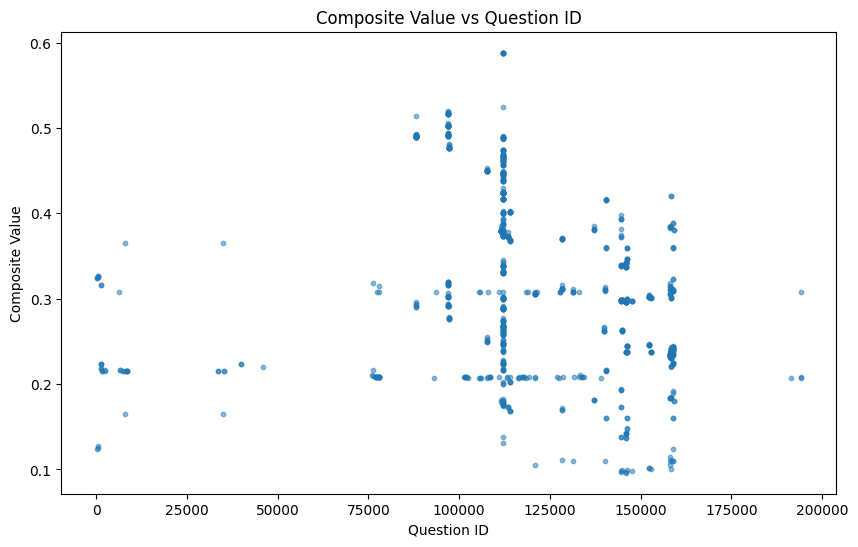

In [38]:
# We have computed the final(composite_value) after normalizing it. Now, our task is to perform plot a graph such that we get a basic idea of how question_id and composite_value relate to each other.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(sorted_data["question_id"], sorted_data["composite_value"], s=10, alpha=0.5)
plt.xlabel("Question ID")
plt.ylabel("Composite Value")
plt.title("Composite Value vs Question ID")
plt.show()

# K-Means Algorithm
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here, we want to categorize the data into easy, medium and hard on the basis of user responses.
We took a pre-assessment test which included 10 members(2 AI/ML teachers, 4 AI/ML domain students and 4 students from other Computer Science branches). Their responses were stored into different parameters created by us. In order to classify the questions into easy, medum and hard, we will perform the K-means algorithm. Before this, we have plotted the points between "question-id" on x-axis and composite value(final_integration_of_parameters) on y-axis.

In [39]:
# K-Means Clustering
from sklearn.cluster import KMeans

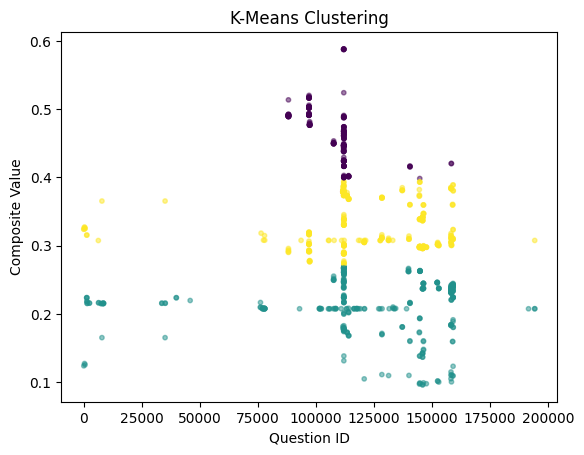

In [40]:
kmeans = KMeans(n_clusters=3)
sorted_data["kmeans_cluster"] = kmeans.fit_predict(sorted_data[["composite_value"]])

# Visualizing K-Means clusters
plt.scatter(
    sorted_data["question_id"],
    sorted_data["composite_value"],
    c=sorted_data["kmeans_cluster"],
    cmap="viridis",
    s=10,
    alpha=0.5,
)
plt.xlabel("Question ID")
plt.ylabel("Composite Value")
plt.title("K-Means Clustering")
plt.show()

# Categories wise K-Means Algorithm
Here, as Parakh Website has 7 differenet categories for Computer Science Dept, we will apply K-Means Algo for each of the categories inorder to send questions in an adaptive manner for each category!

In [41]:
def cal_kmeans_plot(sorted_data):
    kmeans = KMeans(n_clusters=3)
    sorted_data["kmeans_cluster"] = kmeans.fit_predict(sorted_data[["composite_value"]])

    # Visualizing K-Means clusters
    plt.scatter(
        sorted_data["question_id"],
        sorted_data["composite_value"],
        c=sorted_data["kmeans_cluster"],
        cmap="viridis",
        s=10,
        alpha=0.5,
    )
    plt.xlabel("Question ID")
    plt.ylabel("Composite Value")
    plt.title("K-Means Clustering")
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9852\1146671055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data["kmeans_cluster"] = kmeans.fit_predict(sorted_data[["composite_value"]])


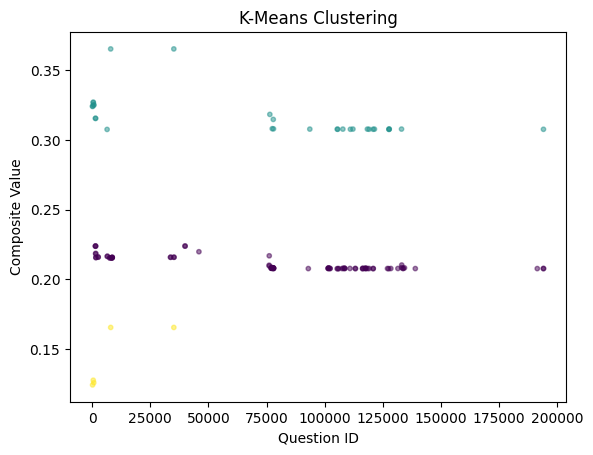

In [42]:
cal_kmeans_plot(
    sorted_data[sorted_data["specialization"] != "Deep & Reinforcement Learning"]
)

In [43]:
sorted_data[sorted_data["specialization"] == "Deep & Reinforcement Learning"]

,id,time_required,option_marked_id,question_id,test_attempts,correct,user_id,title,answer_id,specialization,...,difficulty,updated_difficulty,weighted_accuracy,normalized_time_required,normalized_question_count,normalized_avg_time_spent_per_question,normalized_accuracy,normalized_updated_difficulty,composite_value,kmeans_cluster
0,7147,1266907,446952,112007,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,How to reduce overfitting in deep learning mod...,446952.0,Deep & Reinforcement Learning,...,0.5,0.4,0.5,1.000000,0.592593,1.000000,0.562500,0.0,0.487269,0
1,7157,452012,447031,112027,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"If we choose learning rate that’s too large, w...",447030.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.356780,0.444444,0.494853,0.500000,1.0,0.524052,0
2,7160,335254,447083,112040,0,True,315ec434-f72c-49ea-9cb5-de71a4005588,Dropout is applied,447083.0,Deep & Reinforcement Learning,...,0.5,0.4,0.5,0.264619,0.518519,0.315143,0.428571,0.0,0.290251,2
3,7164,310451,447148,112056,0,False,315ec434-f72c-49ea-9cb5-de71a4005588,"When you use 1×1 convolutions in a CNN, what p...",447147.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.245042,0.481481,0.342989,0.230769,1.0,0.424330,0
4,6514,309669,351767,88204,0,False,91b6653c-9dad-4ca0-aefa-6784fb434be7,The input image has been converted into a matr...,351766.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.244424,1.000000,0.335915,0.185185,1.0,0.513589,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,6414,49,429604,145968,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,The ____________ algorithm allows the informat...,582718.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.000032,0.222222,0.015631,0.166667,1.0,0.296011,2
971,6508,34,632140,158378,0,False,1b8b2486-81f5-49bf-8fcb-8bb8d81f27f1,Which of the following is a widely used and ef...,632349.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.000021,0.185185,0.035562,0.200000,1.0,0.300595,2
972,6409,30,429604,145943,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,___________ is an optimization algorithm that'...,582618.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.000017,0.259259,0.038601,0.285714,1.0,0.341428,2
973,6415,27,429604,146271,0,False,14c7721b-55b2-470f-9e25-4cd222c72fd7,"In the paradigm of semi-supervised learning, _...",583930.0,Deep & Reinforcement Learning,...,0.5,0.6,0.0,0.000015,0.185185,0.004125,0.000000,1.0,0.237451,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_9852\1146671055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data["kmeans_cluster"] = kmeans.fit_predict(sorted_data[["composite_value"]])


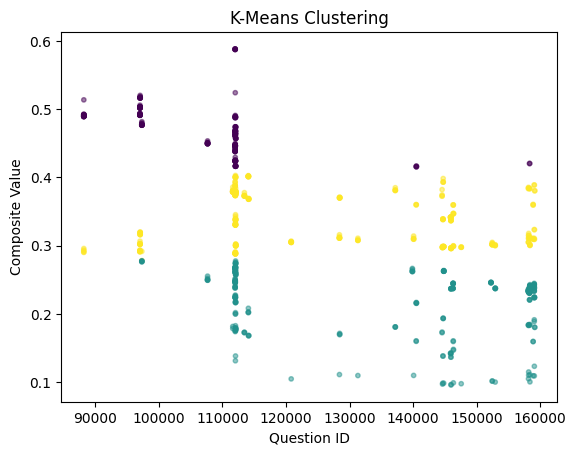

In [44]:
cal_kmeans_plot(
    sorted_data[sorted_data["specialization"] == "Deep & Reinforcement Learning"]
)